# Extra Notebooks Analyses

In [1]:
import sys
sys.path.insert(0, '../archaeology')



from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3


from db import connect, Query
import analysis_helpers, importlib
importlib.reload(analysis_helpers)
from analysis_helpers import display_counts
from analysis_helpers import distribution_with_boxplot

%matplotlib inline

In [2]:
with connect() as session:
    print('Last query:', session.query(Query).all()[-1])
    markdowns = pd.read_sql("""
        SELECT m.*
        FROM notebooks n, notebook_markdowns m
        WHERE NOT (n.kernel = 'no-kernel' AND n.nbformat = '0')
        AND n.processed & 15 = 0
        AND n.skip & 2048 = 0
        AND n.skip & (1024 + 512) = 0
        AND n.skip & (1024 + 512 + 128) = 0
        AND m.cell_count > 0
        AND m.notebook_id = n.id
    """, session.connection())

Last query: <Query(language:"Jupyter Notebook" created:2018-04-16T03:56:05Z..2018-04-16T22:18:58Z)>


## Notebook size

Analyzes len, lines, words, stopwords

Other analyses of meaningful_lines, meaningful_words, meaningful_stopwords are in the A2 notebook.

Distribution(min=0, q1=282.0, median=1241.0, q3=4277.0, max=3473082)


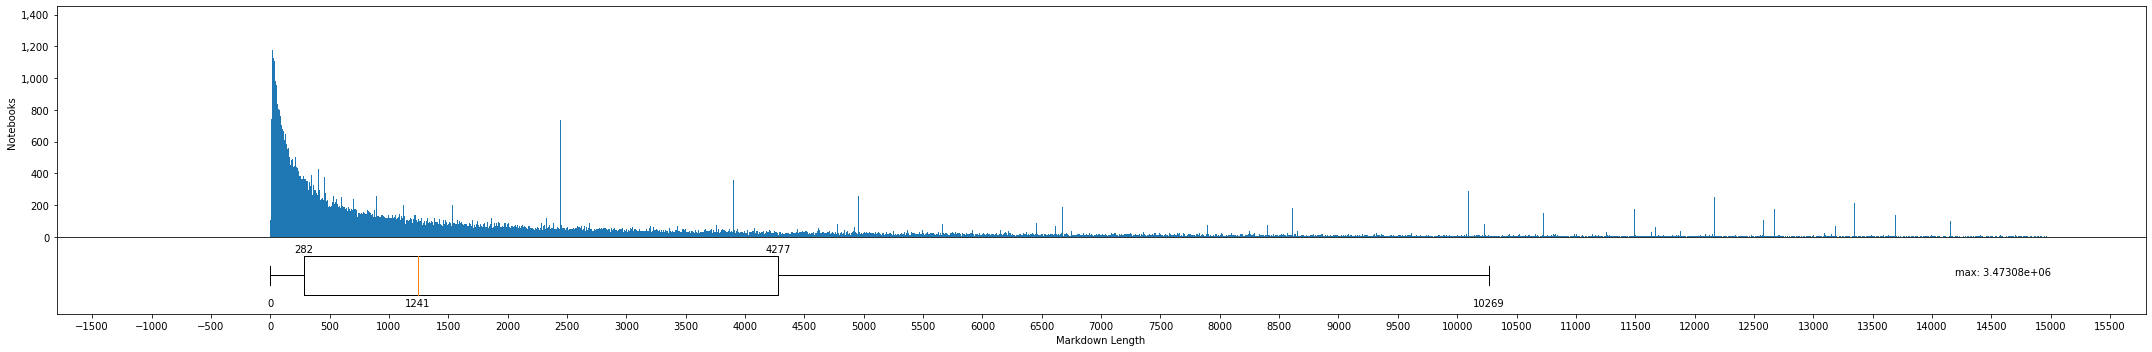

In [3]:
column = markdowns["len"]
distribution = distribution_with_boxplot(column, -1000, 15000, 500, "Notebooks", "Markdown Length",  True)
print(distribution)

Distribution(min=1, q1=11.0, median=31.0, q3=79.0, max=44970)


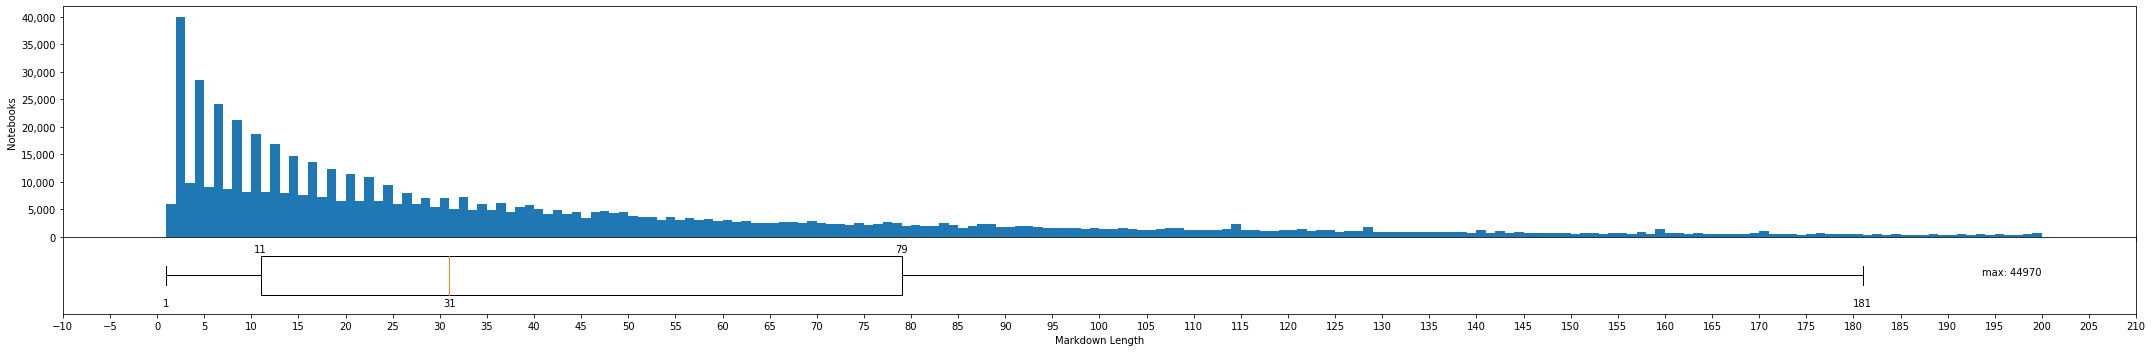

In [4]:
column = markdowns["lines"]
distribution = distribution_with_boxplot(column, 0, 200, 5, "Notebooks", "Markdown Length",  True)
print(distribution)

Distribution(min=0, q1=41.0, median=182.0, q3=646.0, max=87991)


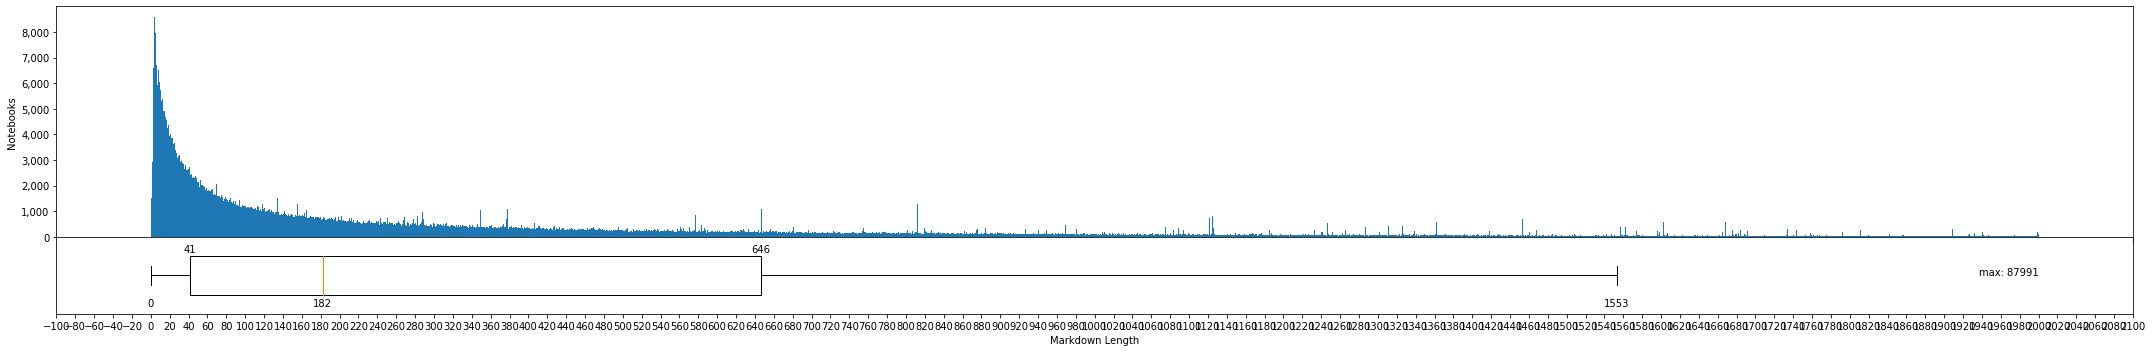

In [5]:
column = markdowns["words"]
distribution = distribution_with_boxplot(column, 0, 2000, 20, "Notebooks", "Markdown Length",  True)
print(distribution)

Distribution(min=0, q1=4.0, median=44.0, q3=204.0, max=29000)


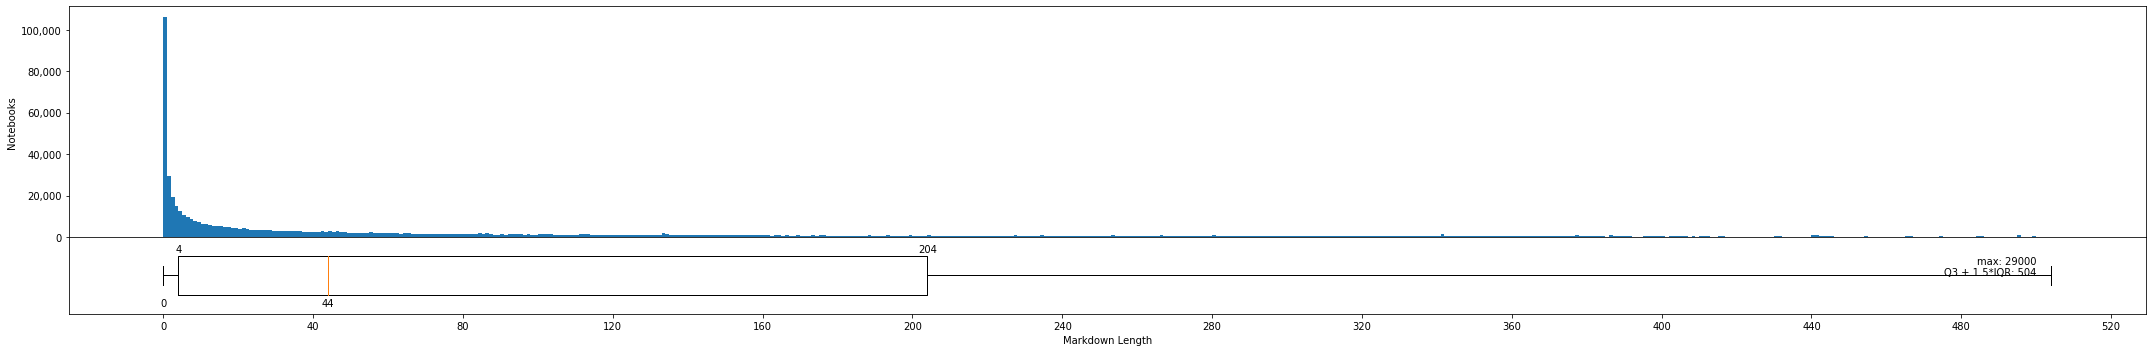

In [6]:
column = markdowns["stopwords"]
distribution = distribution_with_boxplot(column, 0, 500, 40, "Notebooks", "Markdown Length",  True)
print(distribution)

## Markdown language

### Main language

,0
english,554507
undetected,74554
russian,16713
spanish,14582
french,12725
portuguese,11054
german,6289
italian,5701
indonesian,2937
norwegian,2053


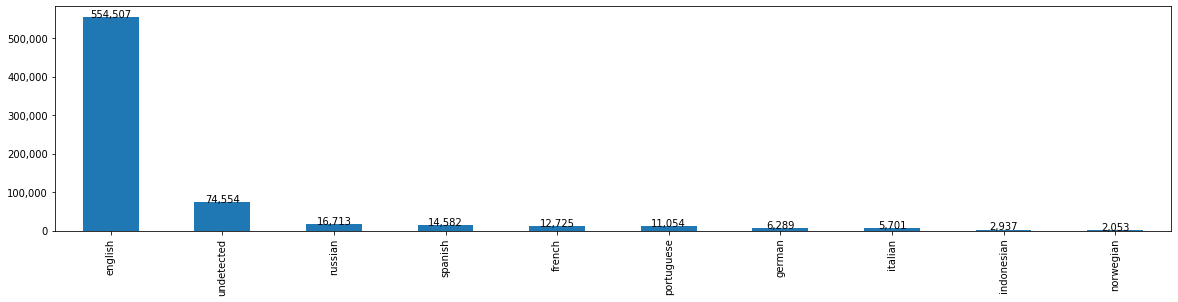

In [7]:
counter = Counter()
markdowns["main_language"].agg(lambda x: counter.update({
    y for y in x.split(",")
    if y
}))
del counter['']
counts = pd.Series(counter).sort_values(ascending=False)
fig, cnt = display_counts(
    counts, width=20, show_values=True, plot=False,
    cut=slice(None, 10), logy=False
)
display(cnt)
ax = plt.gca()
ax.legend().set_visible(False)

### Languages

Other analyses of english markdown, grouped analyses of other and undetected languages are in the A2 notebook.


,0
english,619001
undetected,268314
french,89408
italian,88661
german,69111
romanian,51645
indonesian,50286
spanish,39980
norwegian,35670
portuguese,31956


Notebooks with French markdown: 89408
Notebooks with Danish markdown: 30297


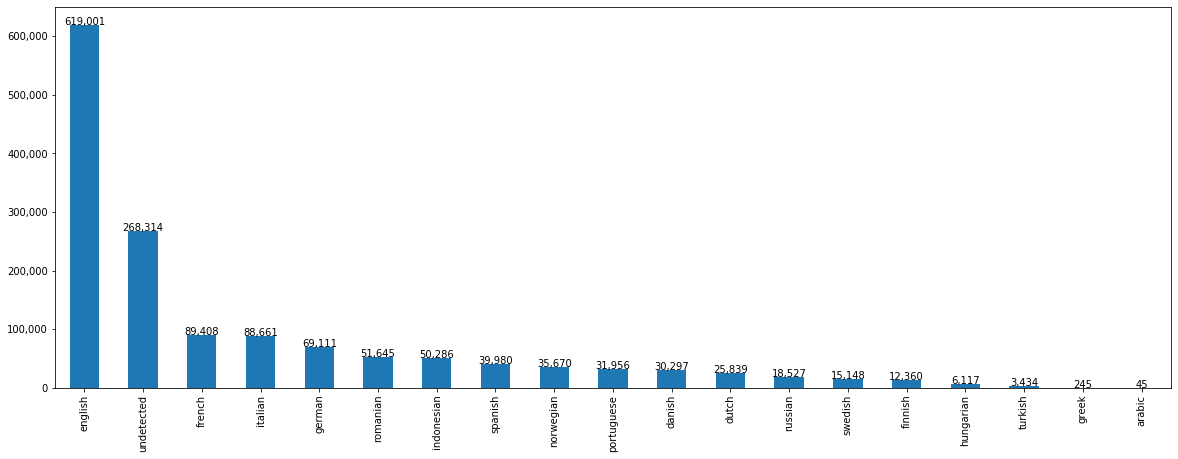

In [8]:
counter = Counter()
markdowns["languages"].agg(lambda x: counter.update({
    y for y in x.split(",")
    if y
}))
del counter['']
counts = pd.Series(counter).sort_values(ascending=False)
fig, cnt = display_counts(
    counts, width=20, show_values=True, plot=False,
    cut=slice(None, 20), logy=False
)
display(cnt)
ax = plt.gca()
ax.legend().set_visible(False)

print("Notebooks with French markdown:", cnt.loc["french", 0])
print("Notebooks with Danish markdown:", cnt.loc["danish", 0])


,0
english,619001
other,327908
undetected,268314


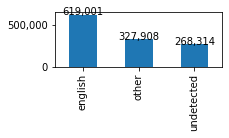

In [9]:
counter = Counter()
markdowns["languages"].agg(lambda x: counter.update({
    (y if y in ("english", "undetected") else "other") for y in x.split(",")
    if y
}))
del counter['']
counts = pd.Series(counter).sort_values(ascending=False)
fig, cnt = display_counts(
    counts, width=20, show_values=True, plot=False,
    cut=slice(None, 10), logy=False
)
display(cnt)
ax = plt.gca()
ax.legend().set_visible(False)

fig.set_size_inches(3, 1)

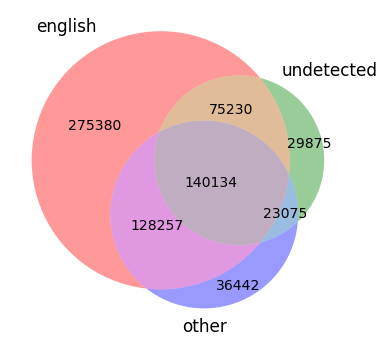

In [10]:
plt.rc('axes', titlesize=16) 
plt.rc('axes', labelsize=16) 
plt.rc('font', size=14)
venn3([
    set(markdowns[markdowns["languages"].str.contains("english")].index.tolist()),
    set(markdowns[markdowns["languages"].str.contains("undetected")].index.tolist()),
    set(markdowns[markdowns["languages"].str.replace("english", "").str.replace("undetected", "").str.replace(",", "").str.len() > 0].index.tolist())
], set_labels=("english", "undetected", "other"))
fig = plt.gcf()
fig.set_size_inches(8, 6)

This notebook analyzed data from the notebooks, but we did not include any of them in the paper